In [14]:
import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

data_dir = os.path.join(os.getcwd(), "data_1")
import pcse

In [15]:
data_dir = os.path.join(os.path.dirname(os.path.join(os.getcwd())), "nevergrad", "functions","irrigation","data","data_1")
print(data_dir)


c:\Users\EEIA 2021\nevergrad\nevergrad\functions\irrigation\data\data_1


##### Paramètre de culture

In [16]:
from pcse.fileinput import CABOFileReader
cropfile = os.path.join(data_dir, 'crop', 'SUG0601.crop')
cropd = CABOFileReader(cropfile)

In [17]:
#Paramètre du sol
soilfile = os.path.join(data_dir, 'soil', 'ec3.soil')
soild = CABOFileReader(soilfile)

In [18]:
#Paramètre de site
from pcse.util import WOFOST72SiteDataProvider
sited = WOFOST72SiteDataProvider(WAV=10, CO2=360)
print(sited)

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360}
{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 10.0, 'SMLIM': 0.4}


In [19]:
#Mise en commun des paramètres
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

In [20]:
#agrogestion
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'agro', 'sugarbeet_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

#agrogestion avec irrigation
agromanagement_file_irrigation = os.path.join(data_dir, 'agro', 'sugarbeet_calendar_irrigation.agro')
agromanagement_irrigation = YAMLAgroManagementReader(agromanagement_file_irrigation)
print(agromanagement_irrigation)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2006-01-01:
    CropCalendar:
      crop_end_date: 2006-10-20
      crop_end_type: harvest
      crop_name: sugar-beet
      crop_start_date: 2006-04-05
      crop_start_type: emergence
      max_duration: 300
      variety_name: sugar-beet-601
    StateEvents: null
    TimedEvents: null

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2006-01-01:
    CropCalendar:
      crop_end_date: 2006-10-20
      crop_end_type: harvest
      crop_name: sugar-beet
      crop_start_date: 2006-04-05
      crop_start_type: emergence
      max_duration: 300
      variety_name: sugar-beet-601
    StateEvents: null
    TimedEvents:
    - comment: All irrigation amounts in cm
      event_signal: irrigate
      events_table:
      - 2006-04-15:
          amount: 10
          efficiency: 0.7
      - 2006-06-15:
          amount: 15
          efficiency: 0.7
      - 2006-08-15:

In [27]:
#Données météorologigues
"""from pcse.fileinput import ExcelWeatherDataProvider
weatherfile = os.path.join(data_dir, 'meteo', 'nl1.xlsx')
wdp = ExcelWeatherDataProvider(weatherfile)
print(wdp)"""

from pcse.db import NASAPowerWeatherDataProvider
wdp = NASAPowerWeatherDataProvider(
    latitude=51.97, longitude=5.67,
)


In [28]:
#construction du modèle et initialisation
from pcse.models import Wofost72_WLP_FD, Wofost72_PP
wofsim = Wofost72_WLP_FD(parameters, wdp, agromanagement)
wofsim_irrigation = Wofost72_WLP_FD(parameters, wdp, agromanagement_irrigation)

In [23]:
#lancement de la simu
wofsim.run_till_terminate()
wofsim_irrigation.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2006-10-16,2.0,1.048787,21557.705173,14410.185356,3408.824045,3738.695772,2805.686837,0.052878,120.0,0.283340,34.000845
2006-10-17,2.0,1.055901,21628.846417,14474.212476,3412.381108,3742.252834,2807.138699,0.030516,120.0,0.282876,33.945161
2006-10-18,2.0,1.049414,21658.771700,14501.145230,3413.877372,3743.749098,2807.749419,0.030184,120.0,0.284605,34.152545
2006-10-19,2.0,1.052133,21685.964928,14525.619135,3415.237033,3745.108759,2808.304383,0.043053,120.0,0.284840,34.180768
2006-10-20,2.0,1.043584,21717.141971,14553.678474,3416.795885,3746.667611,2808.940650,0.039061,120.0,0.284271,34.112520


In [24]:
df1_results = pd.DataFrame(wofsim_irrigation.get_output())
df1_results = df1_results.set_index("day")
df1_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2006-10-16,2.0,1.088588,22757.309359,15428.016467,3471.697426,3857.595466,2914.100074,0.054374,120.0,0.282265,33.871770
2006-10-17,2.0,1.095802,22829.444761,15492.938329,3475.304196,3861.202236,2915.572225,0.031374,120.0,0.281789,33.814647
2006-10-18,2.0,1.084043,22859.373170,15519.873897,3476.800617,3862.698656,2916.183009,0.030928,120.0,0.283510,34.021217
2006-10-19,2.0,1.086735,22886.291362,15544.100270,3478.146527,3864.044566,2916.732360,0.044108,120.0,0.283744,34.049258
2006-10-20,2.0,1.073627,22917.204512,15571.922105,3479.692184,3865.590223,2917.363240,0.039903,120.0,0.283173,33.980756


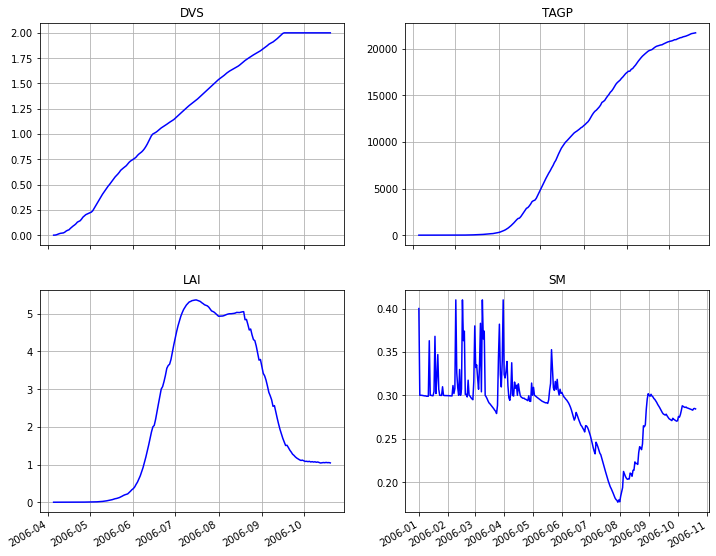

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["DVS", "TAGP", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
    ax.grid()
fig.autofmt_xdate()

plt.savefig('courbe_avant_irrigation.png')

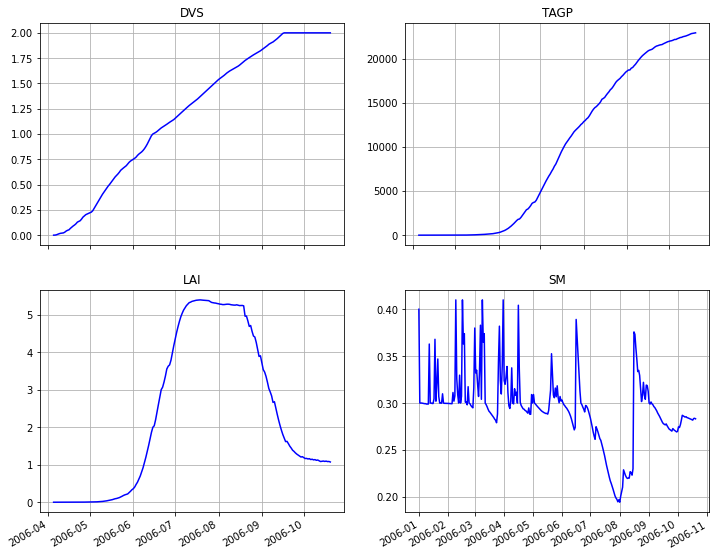

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["DVS", "TAGP", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df1_results.index, df1_results[var], 'b-')
    ax.set_title(var)
    ax.grid()
fig.autofmt_xdate()
plt.savefig('courbe_after_irrigation.png')